In [1]:
# Import libraries
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from IPython.display import Markdown as md
from IPython.core.magic import register_cell_magic
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from IPython.display import Latex

# Allow for markdown code cells
@register_cell_magic
def markdown(line, cell):
    return md(cell.format(**globals()))

In [2]:
# Load data
df = pd.read_csv('data.csv').set_index('x (meters)')

# Load lab metadata
labmeta = yaml.safe_load(open('labmeta.yaml'))

# Parse meta
name = labmeta["name"]
course = labmeta["course"]
labNum = labmeta["labNum"]
labDate = labmeta["labDate"]
labName = labmeta["labName"]

In [3]:
%%markdown

# Lab {labNum}: {labName}
Name: **{name}** \
Class: **{course}** \
Date: **{labDate}**


# Lab 1: The Lab Name
Name: **Your Name** \
Class: **Physics Lab XXXX (YYYYY)** \
Date: **YYYY-MM-DD**


<p style="page-break-after:always;"></p>

## Objective

To learn to plot a straight line graph and determine the slope and the y-intercept.

## Equipment

None

## Theory

As shown in the "Scatterplot with Trendline" section below, a two-dimensional set of data can be visualized on a coordinate plane, using the equation $y=mx+b$ where $m$ is the slope and $b$ is the $y$-intercept.

## Procedure:

1. Data (see below) was provided by the professor.
1. A linear trendline was fit to the data.
1. Using the linear trendline we calculated the slope ($m$) and $y$-intercept ($b$).

# Data

In [4]:
from IPython.display import display, HTML

HTML(df.to_html())

,y (meters)
x (meters),
0,-2.50
1,4.95
2,8.10
3,3.80
4,12.00
5,19.20
6,23.10


# Calculations

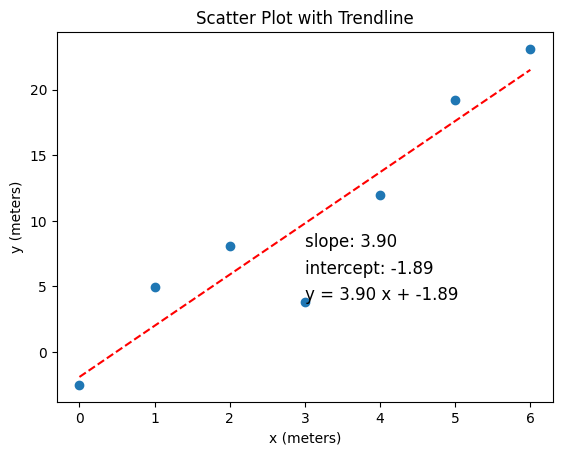

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
# Calculate the standard deviation
deviation = df.std(ddof=0)
deviation_y = deviation['y (meters)'];
deviation_str = str("%.2f" % round(deviation_y, 2))

# Calculate the mean
mean = df.mean(axis=0)
mean_y = mean['y (meters)']
mean_y_str = str("%.2f" % round(mean_y, 2))


plt.scatter(df.index, df['y (meters)'])

# Calculate trendline using NumPy's polyfit
z = np.polyfit(df.index, df['y (meters)'], 1)  # 1 for linear trendline
trend_slope, trend_intercept = z
trend_slope_str = str("%.2f" % round(trend_slope,2))
trend_intercept_str = str("%.2f" % round(trend_intercept,2))

p = np.poly1d(z)

# Plot the trendline
plt.plot(df.index, p(df.index), "r--")

# Set some nice labels
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Scatter Plot with Trendline')
plt.text(3, 8, f'slope: {trend_slope_str}', fontsize=12)
plt.text(3, 6, f'intercept: {trend_intercept_str}', fontsize=12)
plt.text(3, 4, f'y = {trend_slope_str} x + {trend_intercept_str}', fontsize=12)

# Render the plot
plt.show()

# Show the math on standard deviation
display(Latex(f'$\
σ=\sqrt{{ \
  \\frac{{ \
    \sum_{{i=1}}^n{{ \
      (x_i - x̄)^2 \
    }} \
  }} \
  {{n}} \
}} \
$'))

display(Latex(f'$\
σ=\sqrt{{ \
  \\frac{{ \
    \sum_{{i=1}}^n{{ \
      (x_i - {mean_y_str})^2 \
    }} \
  }} \
  {{{df.shape[0]}}} \
}} \
$'))

display(Latex(f'$\
σ= {deviation_str} \
$'))

# Results

In [6]:
%%markdown

The slope of the trendline is **{trend_slope_str}**

The y-intercept of the trendline is **{trend_intercept_str}**

The standard deviation (σ) of the population is **{deviation_str}**


The slope of the trendline is **3.90**

The y-intercept of the trendline is **-1.89**

The standard deviation (σ) of the population is **8.31**
